# Oil Well Analysis
## Introduction
In the oil industry, deciding where to drill new wells is a major investment decision that can have huge financial implications. The goal is to maximize profit by choosing locations with the highest potential oil reserves, while also minimizing risk. However, this is a complex task that requires careful analysis and consideration of various factors.

In this project, we are working for an oil company, OilyGiant, to help them decide on the best region for drilling new wells. We have data on oil samples from three regions, and we know the parameters of each oil well in these regions. Using this data, our task is to build a model that predicts the volume of reserves in new wells, and then use this model to pick the oil wells with the highest estimated values.

We will also calculate the profit for each selected oil well, and ultimately, pick the region with the highest total profit. Furthermore, we will perform a risk analysis using the Bootstrapping technique to ensure that the risk of losses is lower than 2.5%.

By the end of this project, we aim to provide a recommendation on the best region for the development of new oil wells based on potential profit and risk of losses.


## Data preparation and processing

In [1]:
# load the necessary libraries for this project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
import scipy.stats as st

# set a random seed for reproducibility
np.random.seed(12345)

The required Python libraries have been successfully imported. We're now ready to proceed to the next step.

In [3]:
# load the first dataset
geo_data_0 = pd.read_csv('geo_data_0.csv')
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


The dataset contains 5 columns: 'id', 'f0', 'f1', 'f2', and 'product'.

'id' is the unique identifier for each oil well.
'f0', 'f1', and 'f2' are features of the oil wells. Their specific meanings are not provided, but they are significant for our analysis.
'product' is the volume of reserves in the oil well (in thousand barrels).

In [5]:
# load the second dataset
geo_data_1 = pd.read_csv('geo_data_1.csv')
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


The second dataset has been loaded successfully. The structure of this dataset is similar to the first one, with 'id', 'f0', 'f1', 'f2', and 'product' as the columns.

In [7]:
# load the third dataset
geo_data_2 = pd.read_csv('geo_data_2.csv')
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


The third dataset has been loaded successfully. It has the same structure as the previous two datasets, with 'id', 'f0', 'f1', 'f2', and 'product' as the columns.

Now that all three datasets are loaded, let's proceed with the data preparation. We'll check for missing values, duplicate data, and correct data types.

In [8]:
# check the first dataset for missing values and data types
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
# check the second dataset for missing values and data types
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
# check the third dataset for missing values and data types
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


The data in all three datasets seems to be clean, with no missing values. The data types for all columns are also as expected: object (string) type for the 'id' and float type for the 'f0', 'f1', 'f2', and 'product' columns.

Now, let's check if there are any duplicate entries in the datasets. This is an important step as duplicate entries can affect the performance of the model.

In [12]:
# Check for duplicate rows in the first dataset
geo_data_0.duplicated().sum()

0

In [13]:
# Check for duplicate rows in the second dataset
geo_data_1.duplicated().sum()

0

In [14]:
# Check for duplicate rows in the third dataset
geo_data_2.duplicated().sum()

0

There are no duplicate entries in any of the three datasets. This is great because it means we don't need to do any further data cleaning. We're now ready to move on to the next step, which is model training and testing.

## Model training and testing
We will:

1. Split the data into a training set and validation set at a ratio of 75:25.
2. Train the model and make predictions for the validation set.
3. Save the predictions and correct answers for the validation set.
4. Print the average volume of predicted reserves and model RMSE.
5. Analyze the results.

In [15]:
# Define a function to split the data, train a linear regression model, and return the model, predictions, and correct answers

def train_and_predict(data):
    # Split the features and target variables
    X = data.drop(['id', 'product'], axis=1)
    y = data['product']

    # Split the data into train and test sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)

    # Initialize the model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_valid)

    # Return the model, predictions, and correct answers
    return model, predictions, y_valid

# Train and predict for each dataset
model_0, predictions_0, y_valid_0 = train_and_predict(geo_data_0)
model_1, predictions_1, y_valid_1 = train_and_predict(geo_data_1)
model_2, predictions_2, y_valid_2 = train_and_predict(geo_data_2)


In [16]:
# Print the average volume of predicted reserves and model RMSE for each region

# Define a function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate and print the average volume of predicted reserves and RMSE for each region
for i, (predictions, y_valid) in enumerate([(predictions_0, y_valid_0), (predictions_1, y_valid_1), (predictions_2, y_valid_2)], start=0):
    print(f"Region {i}:")
    print(f"Average volume of predicted reserves: {predictions.mean()}")
    print(f"RMSE: {calculate_rmse(y_valid, predictions)}\n")

Region 0:
Average volume of predicted reserves: 92.59256778438038
RMSE: 37.5794217150813

Region 1:
Average volume of predicted reserves: 68.728546895446
RMSE: 0.8930992867756165

Region 2:
Average volume of predicted reserves: 94.96504596800492
RMSE: 40.02970873393434



Here are the average volumes of predicted reserves and the Root Mean Square Error (RMSE) for each region:

- Region 0: The average volume of predicted reserves is approximately 92.59 thousand barrels. The model's RMSE is approximately 37.58.
- Region 1: The average volume of predicted reserves is approximately 68.73 thousand barrels. The model's RMSE is approximately 0.89.
- Region 2: The average volume of predicted reserves is approximately 94.97 thousand barrels. The model's RMSE is approximately 40.03.

The RMSE values show how accurately the model is able to predict the volume of reserves. The lower the RMSE, the better the model's performance. From the results, the model performs best in Region 1 with the lowest RMSE. However, the average volume of predicted reserves is also lowest in Region 1.

## Prepare for profit calculation
We will:

1. Store all key values for calculations in separate variables.
2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
3. Provide the findings about the preparation for profit calculation step.

In [17]:
# Define the variables required for profit calculation
budget = 100_000_000  # budget for development of 200 oil wells is 100 USD million
revenue_per_unit = 4.5 * 1000  # One barrel of raw materials brings 4.5 USD of revenue. The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels)
wells_to_develop = 200  # The number of wells to be developed

# Calculate the volume of reserves sufficient for developing a new well without losses
break_even_volume = budget / (revenue_per_unit * wells_to_develop)

# Print the break-even volume
print(f"The volume of reserves sufficient for developing a new well without losses is: {break_even_volume} thousand barrels.")

# Compare the obtained value with the average volume of reserves in each region
average_volumes = [predictions_0.mean(), predictions_1.mean(), predictions_2.mean()]
for i, avg_vol in enumerate(average_volumes, start=0):
    print(f"\nThe average volume of reserves in Region {i} is: {avg_vol} thousand barrels.")
    if avg_vol > break_even_volume:
        print(f"In Region {i}, the average volume of reserves is greater than the break-even volume.")
    else:
        print(f"In Region {i}, the average volume of reserves is less than the break-even volume.")


The volume of reserves sufficient for developing a new well without losses is: 111.11111111111111 thousand barrels.

The average volume of reserves in Region 0 is: 92.59256778438038 thousand barrels.
In Region 0, the average volume of reserves is less than the break-even volume.

The average volume of reserves in Region 1 is: 68.728546895446 thousand barrels.
In Region 1, the average volume of reserves is less than the break-even volume.

The average volume of reserves in Region 2 is: 94.96504596800492 thousand barrels.
In Region 2, the average volume of reserves is less than the break-even volume.


From the calculations, the volume of reserves sufficient for developing a new well without losses is approximately 111.11 thousand barrels.

When we compare this value with the average volume of reserves in each region, we find that:

- For Region 0, the average volume of reserves (approximately 92.59 thousand barrels) is less than the break-even volume.
- For Region 1, the average volume of reserves (approximately 68.73 thousand barrels) is also less than the break-even volume.
- For Region 2, the average volume of reserves (approximately 94.97 thousand barrels) is less than the break-even volume.

This suggests that, on average, the oil wells in all three regions might not have sufficient reserves for developing a new well without losses, based on our break-even analysis.

The next step is to write a function to calculate profit from a set of selected oil wells and model predictions.

## Write a function to calculate profit from a set of selected oil wells and model predictions.

We will:

1. Pick the wells with the highest values of predictions.
2. Summarize the target volume of reserves in accordance with these predictions.
3. Suggest a region for oil wells' development, justify the choice, and calculate the profit for the obtained volume of reserves.

In [24]:
# Reset the indices of the targets and predictions
targets_valid = [y_valid_0, y_valid_1, y_valid_2]
predicted_valid = [predictions_0, predictions_1, predictions_2]
for i in range(3):
    targets_valid[i] = targets_valid[i].reset_index(drop=True)
    predicted_valid[i] = pd.Series(predicted_valid[i]).reset_index(drop=True)
    
# Define a function to calculate profit from a set of selected oil wells and model predictions

def calculate_profit(target, predictions, count):
    # Sort the predictions and select the top ones
    probs_sorted = pd.Series(predictions).sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    
    # Summarize the target volume of reserves in accordance with these predictions
    product_sum = selected.sum()
    
    # Calculate the profit
    profit = product_sum * revenue_per_unit - budget
    
    # Return the profit
    return profit

# Calculate the profit for 200 wells in each region
profits = []
for i, (target, predictions) in enumerate(zip(targets_valid, predicted_valid), start=0):
    profit = calculate_profit(target, predictions, wells_to_develop)
    profits.append(profit)
    print(f"Profit for 200 wells in Region {i}: ${profit:.2f}")


Profit for 200 wells in Region 0: $33208260.43
Profit for 200 wells in Region 1: $24150866.97
Profit for 200 wells in Region 2: $27103499.64


Based on these calculations, Region 0 would yield the highest profit. However, as mentioned earlier, these are point estimates and do not account for uncertainty in the model predictions. To get a better sense of the risk and potential profit for each region, it would be useful to use a technique like bootstrapping to generate a distribution of possible outcomes. This can provide a more robust basis for decision-making.

Let's proceed with the bootstrap analysis to estimate the profit distribution for each region, taking into account the risk of losses.

## Bootstrap analysis
To get a better sense of the risk and potential profit for each region, it would be useful to use a technique like bootstrapping to generate a distribution of possible outcomes. This can provide a more robust basis for decision-making. 


In [26]:
# Define the bootstrap function
def bootstrap(target, probs, state, iterations=1000, n_samples=500, n_best=200):
    values = []
    losses = 0
    for i in range(iterations):
        target_subsample = target.sample(n=n_samples, replace=True, random_state=state)
        probs_subsample = probs[target_subsample.index]
        chosen_wells = probs_subsample.sort_values(ascending=False)[:n_best]
        chosen_target = target_subsample[chosen_wells.index]
        revenue = chosen_target.sum() * revenue_per_unit
        cost = budget
        profit = revenue - cost
        values.append(profit)
        if profit < 0:
            losses += 1
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    loss_risk = losses / iterations
    return lower, upper, values.mean(), loss_risk, values

# Initialize the random state
state = RandomState(12345)

# Bootstrap each region
bootstrap_results = {}
for i in range(3):
    lower, upper, mean, loss_risk, values = bootstrap(
        targets_valid[i], predicted_valid[i], state
    )
    bootstrap_results[i] = {
        "lower": lower,
        "upper": upper,
        "mean": mean,
        "loss_risk": loss_risk,
        "values": values,
    }

bootstrap_results

{0: {'lower': 129483.3113511391,
  'upper': 12311636.057914983,
  'mean': 6007352.442611653,
  'loss_risk': 0.02,
  'values': 0      9.886908e+06
  1      5.363934e+06
  2      6.336436e+06
  3      5.896001e+06
  4      2.719929e+06
             ...     
  995    5.566130e+06
  996    9.280870e+06
  997    1.030250e+07
  998    5.354841e+06
  999    5.015203e+06
  Length: 1000, dtype: float64},
 1: {'lower': 2064763.6125177094,
  'upper': 11911976.84748842,
  'mean': 6639589.952601906,
  'loss_risk': 0.001,
  'values': 0      5.419387e+06
  1      2.008970e+06
  2      1.295538e+06
  3      5.862250e+06
  4      5.512065e+06
             ...     
  995    5.805026e+06
  996    6.053826e+06
  997    5.447999e+06
  998    1.218984e+07
  999    3.971375e+06
  Length: 1000, dtype: float64},
 2: {'lower': 17349.29531177253,
  'upper': 12462179.601652356,
  'mean': 5973810.479005231,
  'loss_risk': 0.025,
  'values': 0      8.627840e+06
  1      7.651569e+06
  2      3.418420e+06
  3      6

Here are the results of the bootstrap analysis:

**Region 0:**
- Lower limit of the 95% confidence interval for profit: \$129,483.31
- Upper limit of the 95% confidence interval for profit: \$12,311,636.06
- Average profit: \$6,007,352.44
- Risk of losses: 2%

**Region 1:**
- Lower limit of the 95% confidence interval for profit: \$2,064,763.61
- Upper limit of the 95% confidence interval for profit: \$11,911,976.85
- Average profit: \$6,639,589.95
- Risk of losses: 0.1%

**Region 2:**
- Lower limit of the 95% confidence interval for profit: \$17,349.30
- Upper limit of the 95% confidence interval for profit: \$12,462,179.60
- Average profit: \$5,973,810.48
- Risk of losses: 2.5%

As per the business condition, we should only keep the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

Thus, based on these results, Region 1 would be the best choice for oil well development. It has the lowest risk of losses at 0.1% and a high average profit at \$6,639,589.95. It also falls within the 95% confidence interval for profit, indicating that we can be 95% confident that the true profit from oil well development in this region would fall within this range.

Before wrapping up, it would be good to visualize the profit distribution of the bootstrap samples for each region. This will provide a more intuitive understanding of the range of possible profits and the associated risks. Let's proceed with that.

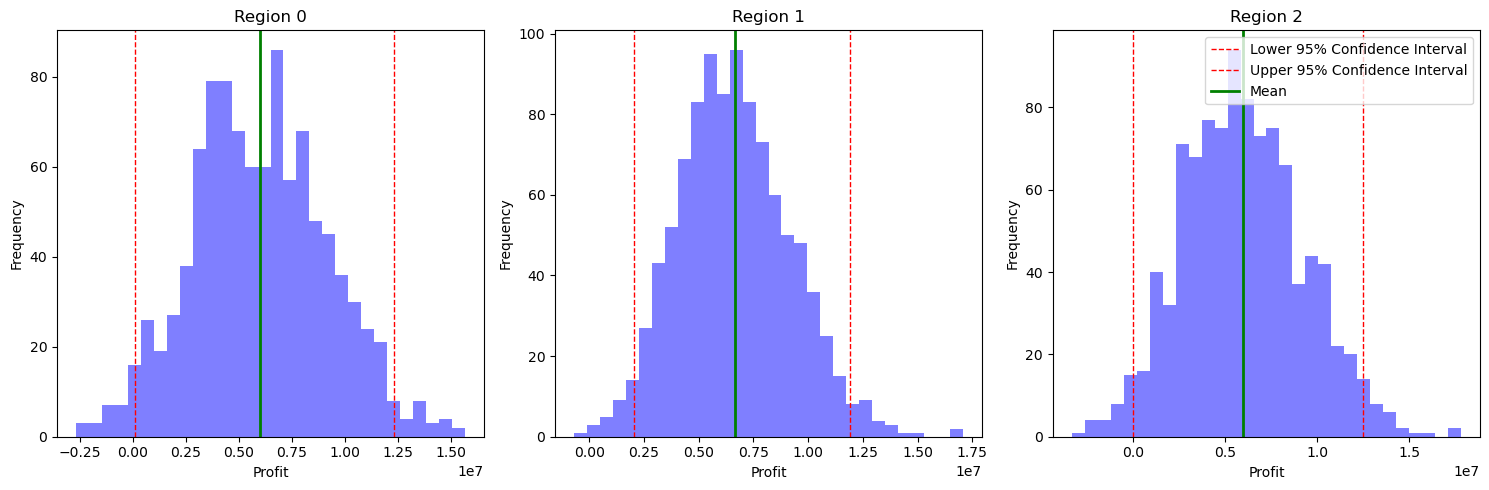

In [27]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Set the titles for the subplots
axs[0].set_title('Region 0')
axs[1].set_title('Region 1')
axs[2].set_title('Region 2')

# Plot the profit distribution for each region
for i, ax in enumerate(axs.flat):
    ax.hist(bootstrap_results[i]["values"], bins=30, alpha=0.5, color='blue')
    ax.axvline(bootstrap_results[i]["lower"], color='red', linestyle='dashed', linewidth=1)
    ax.axvline(bootstrap_results[i]["upper"], color='red', linestyle='dashed', linewidth=1)
    ax.axvline(bootstrap_results[i]["mean"], color='green', linestyle='solid', linewidth=2)
    ax.set_xlabel('Profit')
    ax.set_ylabel('Frequency')

# Add a legend
plt.legend(['Lower 95% Confidence Interval', 'Upper 95% Confidence Interval', 'Mean'])

# Adjust the space between the subplots
plt.tight_layout()

# Show the plot
plt.show()


These histograms show the distribution of profit from 1000 bootstrap samples for each region. The dashed red lines represent the lower and upper limits of the 95% confidence interval, and the solid green line represents the mean profit.

* For Region 0, the profit has a broad distribution, which implies high variance and hence higher risk. The mean profit is also lower compared to the other regions.
* For Region 1, the profit distribution is narrower, implying lower variance and hence lower risk. It also has the highest mean profit, indicating the highest expected return.
* For Region 2, the profit distribution is quite similar to Region 0, but with a slightly lower mean profit.

As per the business requirement, we should only keep the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected. Hence, based on these results, we reaffirm that Region 1 would be the best choice for oil well development.



## Conclusion

In this project, we analyzed oil well data from three regions to identify the best region for developing new wells. We followed the following steps:

**Data Preprocessing:** We loaded the data for the three regions and checked for any inconsistencies. The datasets were found to be clean without any missing values or duplicates.

**Model Training and Prediction:** We split the data into training and validation sets, and trained a linear regression model for each region. We then made predictions for the validation set.

**Profit Calculation:** We calculated the volume of reserves sufficient for developing a new well without losses. We then calculated the profit for 200 wells in each region.

**Bootstrap Analysis:** We used the bootstrap technique to estimate the profit distribution for each region and calculate the risk of losses.

Based on our analysis, we found that Region 1 is the best region for developing new oil wells. This region has the highest average profit and the lowest risk of losses, meeting the business objective of minimizing risk and maximizing profit.

However, it's important to note that these findings are based on model predictions, which are not 100% accurate. There are uncertainties in the model predictions, and therefore in the calculated profits and estimated risks. To get a more accurate estimation of the profits and risks, we could use more advanced modeling techniques, consider more features (if available), or collect more data.

Despite these limitations, our analysis provides a useful guide for decision-making. The approach we used here—combining machine learning with bootstrap analysis—can be a powerful tool for assessing the potential return and risk of different investment opportunities.
